# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
<a id='probability'></a>

## Part I - Probability

To get started, let's import our libraries.

In [210]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [168]:
df=pd.read_csv('ab_data.csv')
print(df.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


**b.** Use the cell below to find the number of rows in the dataset.

In [169]:
rows= df.shape
print('Number of rows is ' + str(rows[0]))

Number of rows is 294478


**c.** The number of unique users in the dataset.

In [170]:
unique_users=df['user_id'].nunique()
print('Number of unique users is ' + str(unique_users))

Number of unique users is 290584


**d.** The proportion of users converted.

In [171]:
#total number of users converted / total number of people
users_converted= df[df['converted']== 1]['user_id'].nunique()
print('Number of users converted is ' + str(users_converted))
p_user_converted = float(users_converted) / float(unique_users)
print('Proportion of users converted is ' + str(p_user_converted))

Number of users converted is 35173
Proportion of users converted is 0.12104245244060237


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [172]:
#Treatment groups that don't land on new page
treat_not_new= df[(df['group'] =='treatment')& (df['landing_page']!= 'new_page')]['user_id'].count()
#New page that don't used by treatment group
new_not_treat= df[(df['group'] !='treatment')& (df['landing_page']== 'new_page')]['user_id'].count()
x= treat_not_new + new_not_treat
print('The number of unmatched data is '+ str(x))

The number of unmatched data is 3893


**f.** Do any of the rows have missing values?

In [173]:
print(df.isna().any()) # there is no missing values

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool


### ToDo 1.2  


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [174]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[(df['group']=='treatment') & (df['landing_page'] =='new_page') | (df['group']=='control') & (df['landing_page'] =='old_page')]
print(df2.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


In [175]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  


**a.** How many unique **user_id**s are in **df2**?

In [176]:
print( 'The number of unique user after removing the mismatches columns is ' + str(df2['user_id'].nunique()))

The number of unique user after removing the mismatches columns is 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [177]:
#print(df2['user_id'].mode())
print(df2[df2.duplicated(subset='user_id') ==True]) # The repeated user_id

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**c.** Display the rows for the duplicate **user_id**? 

In [178]:
print(df2[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [179]:
# Remove one of the rows with a duplicate user_id..
df2= df2.drop([1899] , axis=0)
# Check again if the row with a duplicate user_id is deleted or not
print(df2[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


### ToDo 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [180]:
# number of converting / total number of users
num_conv= df2[df2['converted']==1]['converted'].count()
total= df2['converted'].count()
p_conv= float(num_conv)/ float(total)
print('Probabiliy of any user to convert is ' + str(round(p_conv,4)))

Probabiliy of any user to convert is 0.1196


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [181]:
#number of users in control group that converted / number of users in control group that didnot converet
control_group = df2[df2['group']=='control']
control_group_count= control_group['group'].count()
control_group_converted = control_group[control_group['converted'] == 1]['user_id'].count()
P_conv_cont= float(control_group_converted)/float(control_group_count)
print('Probabiliy of a user in control group to convert is ' + str(round(P_conv_cont, 4)))

Probabiliy of a user in control group to convert is 0.1204


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [182]:
# number of users in treatment group that converted / number of users in treatment group that didnot converet
treatment_group = df2[df2['group']=='treatment']
treatment_group_count= treatment_group['user_id'].count()
treatment_converted= treatment_group[treatment_group['converted']==1]['user_id'].count()
P_conv_treat= treatment_converted/float(treatment_group_count)
print('Probabiliy of a user in treatment group to convert is ' +str(round(P_conv_treat, 4)))

Probabiliy of a user in treatment group to convert is 0.1188


In [183]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=( P_conv_treat - P_conv_cont)

print('The difference between the conversion rates for the two group is '+str(round(obs_diff, 5)))

The difference between the conversion rates for the two group is -0.00158


**d.** What is the probability that an individual received the new page?

In [184]:
p_new_page = float(df2[df2['landing_page'] == 'new_page']['user_id'].count()) / float(df2['user_id'].count())
p_old_page = 1- p_new_page
print('The probability that an individual received the new page is '+ str(round(p_new_page, 5)))

The probability that an individual received the new page is 0.50006


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>As the propability to use new page or old page is approximatly equal (the number of users land on the two different pages) so the convert rate while using new page 0.1188(11.88% of people who receives new page converted) is less than the conversion rate while using the old page 0.1204 (12.04% of people use old page converted) , so from the results so far there is no evidence that the new page lead to more conversion. 


<a id='ab_test'></a>
## Part II - A/B Test


### ToDo 2.1


You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.


>Null: proportion of converted using old page >= proportion of converted using new page -  H0: P(old) >= P(new)

>Alternative: proportion of converted using old page < proportion of converted using new page -  H1: P(old) < P(new)

> H0: pnew−pold == 0

> H1: pnew−pold != 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [185]:
Pnew = p_conv
print('conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is ' + str(Pnew))

conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is 0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [186]:
Pold= p_conv
print('conversion rate for $p_{old}$ under the null hypothesi is ' + str(Pold))

conversion rate for $p_{old}$ under the null hypothesi is 0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [187]:
n_new= treatment_group_count
print('The number of individuals in the treatment group is ' + str(n_new))

The number of individuals in the treatment group is 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [188]:
n_old=control_group_count
print('The number of individuals in the control group is ' + str(n_old))

The number of individuals in the control group is 145274


In [189]:
#p_new - p_old under the null    0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [190]:
# Simulate a Sample for the treatment Group

new_page_converted= np.random.choice([0,1], size= n_new, p=[1-Pnew, Pnew] )

print(new_page_converted)

[0 0 0 ..., 0 1 1]


**f. Simulate Sample for the `control` Group** <br>


In [191]:
# Simulate a Sample for the control Group

old_page_converted= np.random.choice([0,1], size= n_old, p=[1-Pold, Pold] )

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [192]:
𝑝_𝑛𝑒𝑤 = new_page_converted.sum() /n_new
𝑝_𝑜𝑙𝑑 = old_page_converted.sum() /n_old
print(𝑝_𝑛𝑒𝑤 - 𝑝_𝑜𝑙𝑑)

0.00084455710666



**h. Sampling distribution** <br>


In [193]:
#Sampling distribution 

p_diffs = []

for i in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)
    
p_diffs= np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

Text(0.5,1,'Difference in conversions rate between old and new under the null hypothesis')

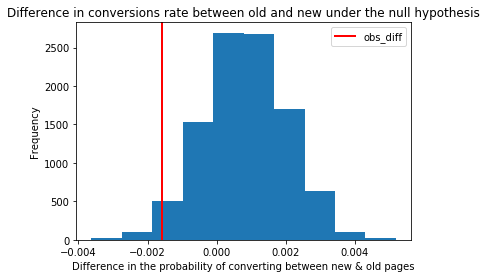

In [194]:
plt.hist(p_diffs)
plt.xlabel("Difference in the probability of converting between new & old pages")
plt.ylabel('Frequency')
plt.axvline(obs_diff,color='r', linewidth=2, label= 'obs_diff')
plt.legend()
plt.title('Difference in conversions rate between old and new under the null hypothesis')
#Yes the plot is as i excepted as it follows the central limit theorm. 

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [195]:
# The proportion of the p_diffs that are greater than the obs_diff 
(p_diffs > obs_diff).mean() #p-value

0.97740000000000005

**k.** Please explain in words what you have just computed in part **j** above.  


> The value is called P-Value which in this study equal (0.9)                                                  
> Since the accepted Type I error rate(alpha) is 0.05, and our P-value is greater than this rate so the we fail to reject the null hypothesis which means that the new page isn't better than the old page according to the conversion rate



**l. Using Built-in Methods for Hypothesis Testing**<br>


In [196]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = treatment_converted

# number of conversions with the new_page
convert_new = control_group_converted

# number of individuals who were shown the old_page
n_old = control_group_count

# number of individuals who received new_page
n_new = treatment_group_count

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.



In [197]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='larger')
print('Zscore= ', z_score, ' p-value= ', p_value)

Zscore=  -1.26169574219  p-value=  0.896470855197


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>Yes the P-Value and Z-score agree with the previous decision (fail to reject the null), as the P-Value is greater than the (alpha = 0.05). And since in our case H0 (new > old) so it is right-tailed test, and from the results z-score(-1.26) is smaller than the z-alpha (𝑍a= 1.645 ) --> so we fail to reject the null hyopotheisis

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> Since it is binary data (0 & 1) so We should be performing Logistic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives.

In [198]:
df2['intercept']= 1
df2[['no','ab_page']]= pd.get_dummies(df2['group'])
df2=df2.drop('no', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [199]:
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page' ]])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [200]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-21 22:17 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



>**P-value** equals 0.1899, The null hypothesis is that there is no relationship between the convertion rate and the type of the page that the user is landed on, while the alternative hypothesis states that there is a relationship.  And since the type I error is 0.05, we fail to reject the null hypothesis as the p value is more than 0.05

>The p-value associated with ab_page is 0.19. It is higher than 0.05. Thus, the coefficient is not significant.

>Alternative hypothesis from part II: the conversion rate of the old_page is less than the conversion rate of the new_page. This assumes a one-tailed test. In Part III, the alternative hypothesis can be formulated as follows: (1) The landing_page type influences (positively or negatively) the conversion rate or (2) the conversion rate of the old_page is different to the conversion rate of the new_page. This assumes a two-tailed test.

>in both cases, the results do not support the alternative hypothesis sufficiently.

>The p-value is very different. In part II the p-value is 0.91. This might be because the tests of the regression model (not the A/B test) assumes an intercept and because of differences in one or two-tailed testing.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Adding other factors to the model will increase the accuracy and decrease the bias and also will give us more information about the dependent model which is converting. but we should be careful as adding irrelative factor will lead to inacurrate hypothesis testing results in addition to multicollinearity. 

**g. Adding countries**<br> 

In [201]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [202]:
# Join with the df2 dataframe
df_merged= pd.merge(df2, countries)

In [203]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA'] ] = pd.get_dummies(df_merged['country'])
df_merged=df_merged.drop('CA', axis=1)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [204]:
logit1 = sm.Logit(df_merged['converted'],df_merged[['intercept', 'ab_page','UK','US']])
results1 = logit1.fit()
results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-21 22:17 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
US            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

>**The country does not have statistical  significance  on the convertion rate**
>As P-values for the countries is larger than the alpha which is  0.05.

**h. Fit your model and obtain the results**<br> 

In [205]:
df_merged['interaction_US_page'] = df_merged.US *df_merged.ab_page
df_merged['interaction_UK_page'] = df_merged.UK *df_merged.ab_page
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,interaction_US_page,interaction_UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [207]:
df_merged['intercept'] = 1

logit2 = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','US','interaction_US_page','UK','interaction_UK_page']])
results2 = logit2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             No. Iterations:    6.0000     
Dependent Variable:  converted         Pseudo R-squared:  0.000      
Date:                2022-02-21 22:19  AIC:               212782.6602
No. Observations:    290584            BIC:               212846.1381
Df Model:            5                 Log-Likelihood:    -1.0639e+05
Df Residuals:        290578            LL-Null:           -1.0639e+05
Converged:           1.0000            Scale:             1.0000     
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
intercept           -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page             -0.0206   0.0137   -1.5052 0.1323 -0.0473  0.0062
US                  -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
interaction_US_page  0.0314   0.0266    1.1807 0.2377 -0.0207  0.0835
UK                  -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
interaction_UK_page -0.0469   0.0538   -0.8718 0.3833 -0.1523  0.0585
=====================================================================

"""

**SUMMARY AND CONCLUSION**

Regarding the interactions, the P-values for each of them is larger than 0.05. So, they aren't statistically siginifcant which means that the landing_page type don't have an affect for both US & UK.

**Conclusion**
According to the A/B tests and the regression and also the probability results, The new page doesn't lead to increase in the conversion rate compared to the old page. And also according to the regression the type of the landing page and the countries don't affect the conversion rate. So i recommend to either keep the old page or start developing new page with new features.

<a id='finalcheck'></a>

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [211]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0